In [1]:
# linMod.py

In [2]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm

In [7]:
import os
os.chdir('c:/Users/admin/Desktop/Programming/CODE/Python/KocPythonFall2021/inclass/6LinMod/')

In [9]:
data = pd.read_stata('TamingGods.dta')

In [10]:
data

,ccode,year,LND_TOTL,Int_maxyear,polity2_,pts,democracy,loggdp,logpop,Religion,...,NX_scaled,relconflict,relconflict2,RAS4,altRAS4,scaled_RAS42,relmob_vary_lessz,reldemand_vary_lessz,relconflict_lessz,SuperaltRAS4
0,2.0,1980,9158960.0,0.0,10.0,1.0,1.0,10.146846,19.241451,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2.0,1981,9158960.0,0.0,10.0,1.0,1.0,10.162127,19.251265,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2.0,1982,9158960.0,0.0,10.0,1.0,1.0,10.132593,19.260799,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2.0,1983,9158960.0,0.0,10.0,1.0,1.0,10.167618,19.269943,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2.0,1984,9158960.0,0.0,10.0,1.0,1.0,10.228435,19.278601,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,990.0,2009,2830.0,0.0,NaN,1.0,NaN,8.253963,12.126515,0.787117,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7204,990.0,2010,2830.0,0.0,NaN,2.0,NaN,8.250808,12.133663,0.787117,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7205,990.0,2011,2830.0,0.0,NaN,1.0,NaN,8.263109,12.141161,0.787117,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7206,990.0,2012,NaN,0.0,NaN,NaN,NaN,8.267278,12.148920,0.787117,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# first five rows
data.head()

,ccode,year,LND_TOTL,Int_maxyear,polity2_,pts,democracy,loggdp,logpop,Religion,...,NX_scaled,relconflict,relconflict2,RAS4,altRAS4,scaled_RAS42,relmob_vary_lessz,reldemand_vary_lessz,relconflict_lessz,SuperaltRAS4
0,2.0,1980,9158960.0,0.0,10.0,1.0,1.0,10.146846,19.241451,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2.0,1981,9158960.0,0.0,10.0,1.0,1.0,10.162127,19.251265,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2.0,1982,9158960.0,0.0,10.0,1.0,1.0,10.132593,19.260799,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2.0,1983,9158960.0,0.0,10.0,1.0,1.0,10.167618,19.269943,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2.0,1984,9158960.0,0.0,10.0,1.0,1.0,10.228435,19.278601,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
data.describe()

,ccode,year,LND_TOTL,Int_maxyear,polity2_,pts,democracy,loggdp,logpop,Religion,...,NX_scaled,relconflict,relconflict2,RAS4,altRAS4,scaled_RAS42,relmob_vary_lessz,reldemand_vary_lessz,relconflict_lessz,SuperaltRAS4
count,7208.000000,7208.000000,5.947000e+03,6930.000000,5173.000000,5481.000000,5346.000000,5529.000000,6342.000000,6494.000000,...,3247.000000,6360.000000,7208.000000,6148.000000,7208.000000,3306.000000,1407.000000,1407.000000,1340.000000,3247.000000
mean,480.193396,1996.500000,6.022888e+05,0.192929,1.991301,2.323572,0.563786,8.143382,15.142727,0.441102,...,1.479772,0.104403,0.065205,1.003062,9.154411,1.073094,0.189055,0.144989,0.495522,6.480653
std,265.230961,9.811389,1.473004e+06,0.486660,6.942513,1.205023,0.629304,2.179216,2.403559,0.233680,...,1.880338,0.524997,0.337999,1.817514,18.358286,1.249874,0.391691,0.352215,1.055931,5.700299
min,2.000000,1980.000000,0.000000e+00,0.000000,-9.000000,0.000000,0.000000,0.000000,5.573728,0.002286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,313.750000,1988.000000,2.517500e+04,0.000000,-6.000000,1.500000,0.000000,7.361599,13.949541,0.232569,...,0.178571,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,2.178571
50%,456.500000,1996.500000,1.204100e+05,0.000000,4.000000,2.000000,1.000000,8.448858,15.519416,0.462810,...,0.714286,0.000000,0.000000,0.000000,0.000000,0.588889,0.000000,0.000000,0.000000,4.452213
75%,694.500000,2005.000000,5.279700e+05,0.000000,9.000000,3.000000,1.000000,9.530067,16.644045,0.646941,...,1.964286,0.000000,0.000000,1.121495,10.000000,1.544444,0.000000,0.000000,0.000000,9.890342
max,990.000000,2013.000000,9.327489e+06,2.000000,10.000000,5.000000,5.000000,11.723465,21.023886,0.870472,...,10.000000,3.000000,2.000000,10.000000,107.000000,5.888889,1.000000,1.000000,3.000000,25.535713


In [15]:
data.columns

Index(['ccode', 'year', 'LND_TOTL', 'Int_maxyear', 'polity2_', 'pts',
       'democracy', 'loggdp', 'logpop', 'Religion', 'Ethnic', 'lmtnest',
       'pctforest', 'Meast', 'relmob_vary', 'reldemand_vary', 'conflict',
       'cem_strata', 'cem_matched', 'cem_weights', 'recency', 'ongoing',
       'propensity', 'RASindex3_scaled', 'MX_scaled', 'SCX_scaled',
       'NX_scaled', 'relconflict', 'relconflict2', 'RAS4', 'altRAS4',
       'scaled_RAS42', 'relmob_vary_lessz', 'reldemand_vary_lessz',
       'relconflict_lessz', 'SuperaltRAS4'],
      dtype='object')

In [17]:
y = data['Religion']
X = pd.DataFrame(data['Ethnic'])
X['constant'] = 1

In [18]:
X.head()

,Ethnic,constant
0,0.4901,1
1,0.4901,1
2,0.4901,1
3,0.4901,1
4,0.4901,1


In [21]:
#missingness
myFit = sm.OLS(y, X, missing = 'drop').fit()
myFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religion   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           6.09e-40
Time:                        22:07:57   Log-Likelihood:                 349.47
No. Observations:                6358   AIC:                            -694.9
Df Residuals:                    6356   BIC:                            -681.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ethnic         0.1491      0.011     13.320      0.000       0.127       0.171
constant       0.3779      0.006     66.393      0.000       0.367       0.389
==============================================================================
Omnibus:                     1634.092   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.477
Skew:                          -0.227   Prob(JB):                     4.70e-72
Kurtosis:                       1.983   Cond. No.                         4.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
myFit.conf_int()

,0,1
Ethnic,0.127188,0.171087
constant,0.366717,0.389032


In [25]:
def MLERegression(params): # inputs are gueses at our parameters
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta*x # predictions
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=sd))
    return(negLL)

In [31]:
dd = data[['Religion', 'Ethnic']].dropna()
y = dd['Religion']
x = dd['Ethnic']
guess = np.array([.5,.5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options= {'disp': True, 'maxiter': 1000})

Optimization terminated successfully.
         Current function value: -349.470683
         Iterations: 96
         Function evaluations: 172


In [30]:
results

 final_simplex: (array([[0.37786288, 0.14915948, 0.22903925],
       [0.37783905, 0.14921483, 0.22903905],
       [0.37789332, 0.14912562, 0.22900957],
       [0.37787368, 0.14906955, 0.2290257 ]]), array([-349.47068288, -349.47066157, -349.47063624, -349.47061844]))
           fun: -349.4706828801385
       message: 'Optimization terminated successfully.'
          nfev: 172
           nit: 96
        status: 0
       success: True
             x: array([0.37786288, 0.14915948, 0.22903925])

In [32]:
myFit.params

Ethnic      0.149138
constant    0.377875
dtype: float64

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ethnic', ylabel='Religion'>

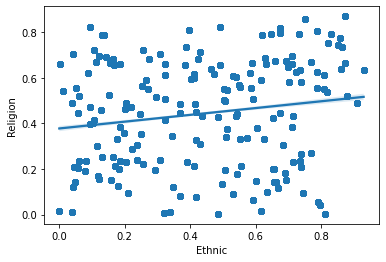

In [33]:
sns.regplot(x,y)